# COVID-19 Patient Prediction from Pre-conditions

Authors: Rohith Kumar Sajja, Ryan Patrick Chellman, Shinjni Maheswari, Tanvi Jadhav

## Data Source: Kaggle
Link: [COVID-19 Patient Pre-consitions dataset](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset)

Table of Contents:


1.   Statistical Analysis
2.   Pre-processing
3.   Feature Engineering
4.   Model Selection



In [3]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt  
import seaborn as sns
import sweetviz as sv
import yellowbrick as yb
from joblib import dump, load

In [4]:
from IPython.display import display, HTML

In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  white solid !important;
  color: white !important;
  text-align: center !important;
}
</style>

In [6]:
df = pd.read_csv('Data/covid.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [8]:
df.describe(include='all')

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602,566602.000000,566602.000000,566602,566602,566602,566602.000000,566602.000000,566602.000000,566602.000000,...,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
unique,563201,NaN,NaN,181,181,124,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0.00E+00,NaN,NaN,15-06-2020,01-06-2020,9999-99-99,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,210,NaN,NaN,13261,13860,530426,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.506726,1.215165,NaN,NaN,NaN,76.562952,1.846262,42.622483,50.400692,...,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,NaN,0.499955,0.410937,NaN,NaN,NaN,39.058676,0.560939,16.659973,47.501579,...,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,1.000000,1.000000,NaN,NaN,NaN,97.000000,2.000000,31.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,97.000000,2.000000,41.000000,97.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,NaN,2.000000,1.000000,NaN,NaN,NaN,97.000000,2.000000,53.000000,97.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000


In [9]:
df.head(20)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


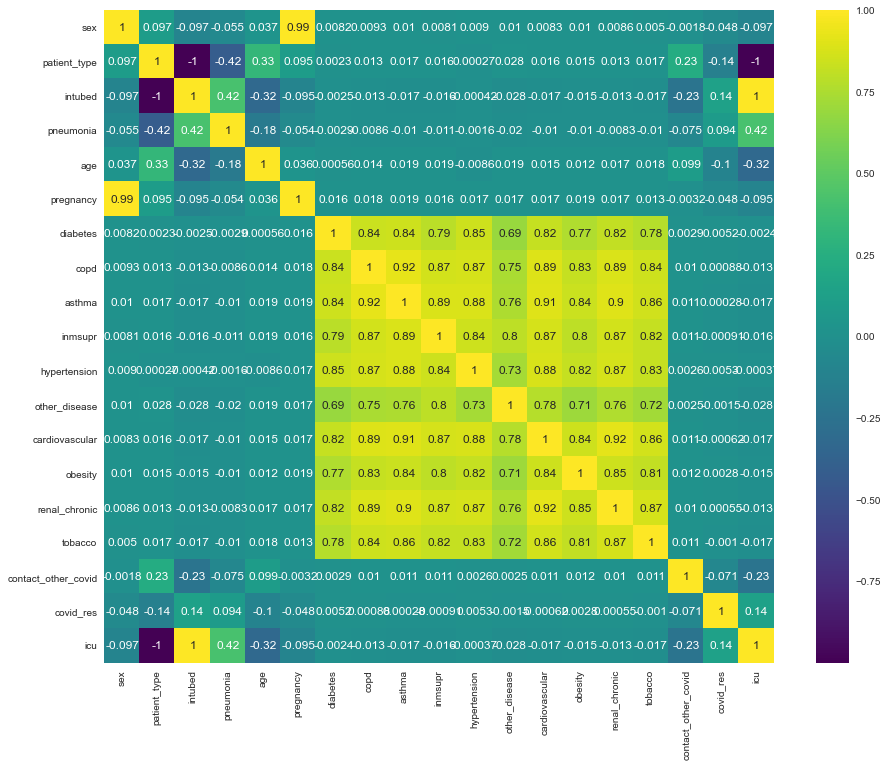

In [10]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [11]:
df = df.drop(['id', 'intubed'], axis=1)

In [12]:
cols_na = [
    "pneumonia",
    "diabetes",
    "copd",
    "asthma",
    "inmsupr",
    "hypertension",
    "other_disease",
    "cardiovascular",
    "obesity",
    "renal_chronic",
    "contact_other_covid",
    "tobacco",
    "sex",
    "covid_res"
]

In [13]:
df.patient_type.unique()

array([1, 2])

In [14]:
covid = df

for col in cols_na:
    covid = covid.loc[(df[col] == 1) | (df[col] == 2)]

# covid = covid.loc[df["date_died"] != '9999-99-99']

In [15]:
for col in cols_na:
    covid[col] = covid[col].apply(lambda x: 0 if x == 2 else 1)

In [16]:
covid.head(10)

,sex,patient_type,entry_date,date_symptoms,date_died,pneumonia,age,pregnancy,diabetes,copd,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,04-05-2020,02-05-2020,9999-99-99,0,27,97,0,0,...,0,0,0,0,0,0,0,0,1,97
7,1,1,21-05-2020,18-05-2020,9999-99-99,0,56,2,0,0,...,0,1,0,0,0,1,1,1,1,97
13,1,1,25-05-2020,23-05-2020,9999-99-99,0,34,2,0,0,...,0,0,0,0,0,0,0,1,1,97
15,1,1,20-06-2020,16-06-2020,9999-99-99,0,34,2,0,0,...,0,0,0,0,0,0,1,0,1,97
16,1,1,24-06-2020,15-06-2020,9999-99-99,0,49,2,1,0,...,0,0,0,0,0,0,0,1,1,97
20,0,1,19-04-2020,19-04-2020,9999-99-99,0,54,97,0,0,...,0,0,0,0,0,0,0,1,1,97
21,1,2,02-06-2020,02-06-2020,9999-99-99,0,25,2,0,0,...,0,0,0,0,0,0,0,1,1,2
24,1,1,15-05-2020,06-05-2020,21-05-2020,0,61,2,0,0,...,0,1,0,0,0,0,0,1,1,97
25,0,1,20-06-2020,18-06-2020,9999-99-99,0,40,97,0,0,...,0,0,0,0,0,0,0,1,1,97
29,1,1,15-05-2020,14-05-2020,9999-99-99,1,49,2,0,0,...,0,1,0,0,0,0,0,1,1,97


In [17]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

dates = ['entry_date', 'date_symptoms', 'date_died']

# for date in dates:
#     covid[date] = pd.to_datetime(covid[date], dayfirst=True) 

# covid['diff_entry_died'] = covid['date_died'] - covid['entry_date']
# covid['diff_symptoms_died'] = covid['date_died'] - covid['date_symptoms']

In [18]:
covid = covid.drop(['entry_date', 'date_symptoms', 'date_died'], axis=1)

# date_diffs = ['diff_entry_died', 'diff_symptoms_died']

# for diff in date_diffs:
#     covid[diff] = pd.to_numeric(covid[diff])

covid.info()

eda_report = sv.analyze([covid, "COVID-19 Pre-conditions"], "covid_res", None, 'auto')
eda_report_html = eda_report.show_html('reports/Preconditions_EDA.html')

:TARGET::                          |█                    | [  5%]   00:00  -> (00:02 left)<class 'pandas.core.frame.DataFrame'>
Int64Index: 343724 entries, 0 to 499690
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   sex                  343724 non-null  int64
 1   patient_type         343724 non-null  int64
 2   pneumonia            343724 non-null  int64
 3   age                  343724 non-null  int64
 4   pregnancy            343724 non-null  int64
 5   diabetes             343724 non-null  int64
 6   copd                 343724 non-null  int64
 7   asthma               343724 non-null  int64
 8   inmsupr              343724 non-null  int64
 9   hypertension         343724 non-null  int64
 10  other_disease        343724 non-null  int64
 11  cardiovascular       343724 non-null  int64
 12  obesity              343724 non-null  int64
 13  renal_chronic        343724 non-null  int64
 14  tobacco   

In [19]:
from IPython.display import IFrame

IFrame(src='./reports/Preconditions_EDA.html', width=1500, height=1000)

In [20]:
X = covid.drop("covid_res", axis=1)
y = covid["covid_res"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

K Nearest Neighbor (KNN) 
 
 Confusion Matrix: 



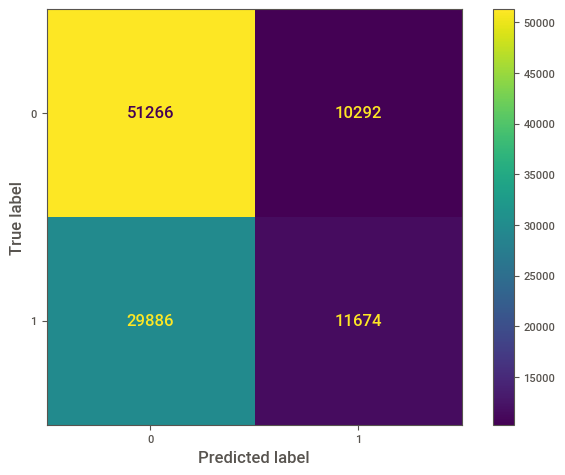

,Score
Accuracy,0.610369
Precision,0.531458
Recall,0.280895
F-score,0.367535
ROC AUC,0.556852
PR AUC,0.551088


In [23]:
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)
knn_confusion = confusion_matrix(y_test, knn_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, knn_predictions)

print("K Nearest Neighbor (KNN) \n \n Confusion Matrix: \n")
knn_conf = plot_confusion_matrix(knn, X_test, y_test, values_format = '.0f')
plt.show()
knn_pr_auc = auc(recall, precision)

knn_scores = pd.DataFrame({'Score': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc, knn_pr_auc]})
knn_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
dump(knn, 'models/knn.joblib')
knn_scores

XGBoost 
 
 Confusion Matrix: 



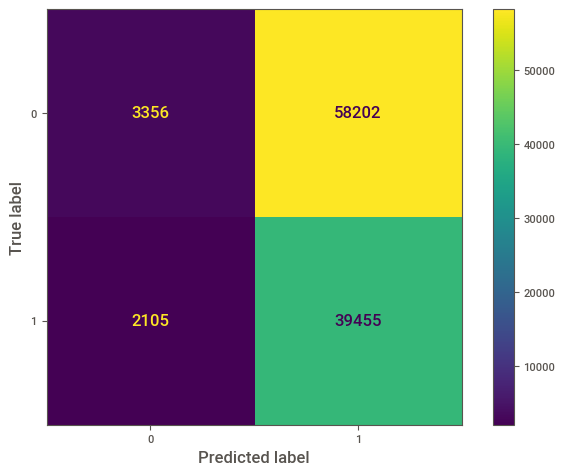

,Score
Accuracy,0.415165
Precision,0.404016
Recall,0.949350
F-score,0.566813
ROC AUC,0.501934
PR AUC,0.686890


In [24]:
xg = xgb.XGBClassifier(random_state=42, learning_rate=1, max_depth=100, eta=0.1, scale_pos_weight=10)
xg.fit(X_train,y_train)
xg_predictions = xg.predict(X_test)
xg_confusion = confusion_matrix(y_test, xg_predictions)
xg_accuracy = accuracy_score(y_test, xg_predictions)
xg_recall = recall_score(y_test, xg_predictions)
xg_precision = precision_score(y_test, xg_predictions)
xg_f1 = f1_score(y_test, xg_predictions)
xg_roc_auc = roc_auc_score(y_test, xg_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, xg_predictions)
xg_pr_auc = auc(recall, precision)

print("XGBoost \n \n Confusion Matrix: \n")
xg_conf = plot_confusion_matrix(xg, X_test, y_test, values_format = '.0f')
plt.show()

xg_scores = pd.DataFrame({'Score': [xg_accuracy, xg_precision, xg_recall, xg_f1, xg_roc_auc, xg_pr_auc]})
xg_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
dump(xg, 'xgb.joblib')
xg_scores

RandomForest 
 
 Confusion Matrix: 



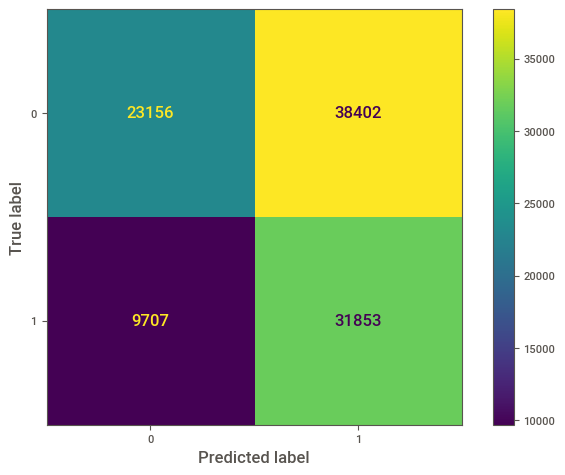

                     importance
pneumonia              0.277457
age                    0.206247
icu                    0.141544
patient_type           0.127759
obesity                0.045512
diabetes               0.040074
contact_other_covid    0.025666
pregnancy              0.023723
hypertension           0.019843
tobacco                0.017349
sex                    0.015068
other_disease          0.014966
inmsupr                0.011662
copd                   0.009290
cardiovascular         0.008839
renal_chronic          0.008737
asthma                 0.006264


,Score
Accuracy,0.533457
Precision,0.453391
Recall,0.766434
F-score,0.569745
ROC AUC,0.571300
PR AUC,0.656980


In [25]:
rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=100,class_weight={0:1,1:2}, min_samples_split=5)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_confusion = confusion_matrix(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, rf_predictions)
rf_pr_auc = auc(recall, precision)

print("RandomForest \n \n Confusion Matrix: \n")
rf_conf = plot_confusion_matrix(rf, X_test, y_test, values_format = '.0f')
plt.show()

feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',                                                                 ascending=False)
print(feature_importances)

rf_scores = pd.DataFrame({'Score': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc, rf_pr_auc]})
rf_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
dump(rf, 'models/rf.joblib')
rf_scores

Multi Layer Perception (MLP) 
 
 Confusion Matrix: 



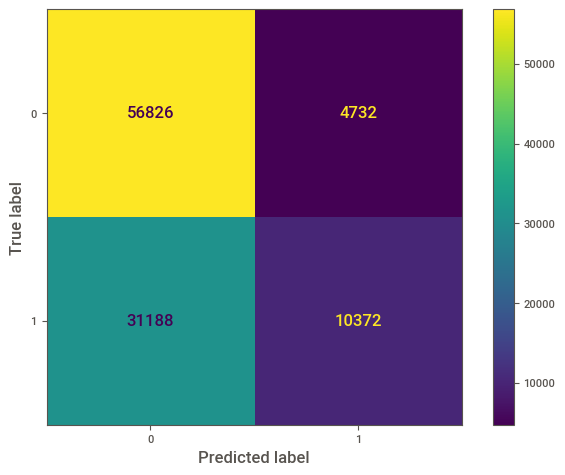

,Score
Accuracy,0.651661
Precision,0.686706
Recall,0.249567
F-score,0.366088
ROC AUC,0.586348
PR AUC,0.619361


In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=5, activation = 'relu',solver='adam')
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)
mlp_confusion = confusion_matrix(y_test, mlp_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_precision = precision_score(y_test, mlp_predictions)
mlp_recall = recall_score(y_test, mlp_predictions)  
precision, recall, thresholds = precision_recall_curve(y_test, mlp_predictions)
mlp_f1 = f1_score(y_test, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test, mlp_predictions)

mlp_f1 = f1_score(y_test, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test, mlp_predictions)
mlp_pr_auc = auc(recall, precision)

print("Multi Layer Perception (MLP) \n \n Confusion Matrix: \n")
mlp_conf = plot_confusion_matrix(mlp, X_test, y_test, values_format = '.0f')
plt.show()

mlp_scores = pd.DataFrame({'Score': [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_roc_auc, mlp_pr_auc]})
mlp_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
dump(mlp, 'models/mlp.joblib')
mlp_scores

In [33]:
model_scores = pd.DataFrame({'Model': ['XGBoost', 'RandomForest', 'K Nearest Neighbor (KNN)', 'Multi Layer Perception (MLP)'],'Accuracy': [xg_accuracy, rf_accuracy, knn_accuracy, mlp_accuracy], 'Precision Score': [xg_precision, rf_precision, knn_precision, mlp_precision], 'Recall': [xg_recall, rf_recall, knn_recall, mlp_recall], 'F1': [xg_f1, rf_f1, knn_f1, mlp_f1], 'ROC AUC': [xg_roc_auc, rf_roc_auc, knn_roc_auc, mlp_roc_auc], 'Precision-Recall AUC': [xg_pr_auc, rf_pr_auc, knn_pr_auc, mlp_pr_auc]})
model_scores.index = np.arange(1, len(model_scores)+1)
model_scores

,Model,Accuracy score,Precision Score,Recall Score,F-score,ROC AUC Score,Precision Recall AUC
1,XGBoost,0.403092,0.403053,0.999952,0.574529,0.500041,0.701512
2,RandomForest,0.533457,0.453391,0.766434,0.569745,0.571300,0.656980
3,K Nearest Neighbor (KNN),0.610369,0.531458,0.280895,0.367535,0.556852,0.551088
4,Multi Layer Perception (MLP),0.651661,0.686706,0.249567,0.366088,0.586348,0.619361


In [27]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [31]:
train_test_report = sv.compare([train_df, "Training Data"], [test_df, "Test Data"], "covid_res", None, 'auto')
train_test_report_html = train_test_report.show_html('Preconditions_Train_Test.html')

IFrame(src='./Preconditions_Train_Test.html', width=1500, height=1000)

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   01:23  -> (00:00 left)
:ASSOCIATIONS GRAPH DONE:          |█████████████████████| [100%]   00:02
Report Preconditions_Train_Test.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [2]:
metrics = {'accuracy':'Accuracy', 'precision':'Precision', 'recall':'Recall', 'f1':'F1', 'rocauc':'ROC AUC', 'prauc':'Precision-Recall AUC'}

def best_model(model_scores, metric):
    max = 0
    best_model = ''
    for score in model_scores[metric]:
        if score > max:
            max = score
            best_model = model_scores['Model']

    return best_model

best_model(model_scores, 'Precision-Recall AUC')